In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# **Data Preparation**

In [ ]:
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.isna().sum().sum()

0

In [ ]:
data['Class'].value_counts()

,count
Class,
0,284315
1,492


#  **Data Visualization**

<Axes: xlabel='Class', ylabel='count'>

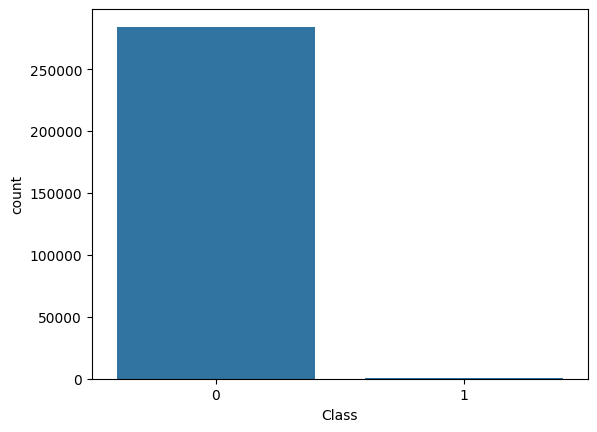

In [ ]:
sns.countplot(x='Class', data=data)

In [ ]:
fraud = data[data.Class == 1]
normal = data[data.Class == 0]

# **Spliting Data**

In [ ]:
X = data.iloc[:, [1,29]].values
y = data.iloc[:, 30].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
data.iloc[:, [1,29]]

,V1,Amount
0,-1.359807,149.62
1,1.191857,2.69
2,-1.358354,378.66
3,-0.966272,123.50
4,-1.158233,69.99
...,...,...
284802,-11.881118,0.77
284803,-0.732789,24.79
284804,1.919565,67.88
284805,-0.240440,10.00


In [ ]:
data.iloc[:, 30]

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


# **Normal Classification Model (Supervised Learning)**

# **Artificial Naural Network (ANN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6676/6676 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9941 - loss: 0.0589
Epoch 2/10
6676/6676 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9981 - loss: 0.0175
Epoch 3/10
6676/6676 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9982 - loss: 0.0137
Epoch 4/10
6676/6676 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9981 - loss: 0.0137
Epoch 5/10
6676/6676 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9981 - loss: 0.0138
Epoch 6/10
6676/6676 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9983 - loss: 0.0116
Epoch 7/10
6676/6676 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9983 - loss: 0.0120
Epoch 8/10
6676/6676 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9981 - loss: 0.0130
Epoch 9/10
6676/6676 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9982 - loss: 0.0117
Epoch 10/10
6676/6676 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9982 - loss: 0.0117
2226/2226 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9983 - loss: 0.0111
Test accuracy: 0.9984129667282104


In [ ]:
ANN_y_pred = model.predict(X_test)
ANN_y_pred_classes = np.where(ANN_y_pred > 0.5, 1, 0)

ANN_accuracy = accuracy_score(y_test, ANN_y_pred_classes)
ANN_precision = precision_score(y_test, ANN_y_pred_classes)
ANN_recall = recall_score(y_test, ANN_y_pred_classes)
ANN_f1 = f1_score(y_test, ANN_y_pred_classes)
ANN_conf_matrix = confusion_matrix(y_test, ANN_y_pred_classes)
ANN_auc = roc_auc_score(y_test, ANN_y_pred)

2226/2226 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [ ]:
print("Accuracy:", ANN_accuracy)
print("Precision:", ANN_precision)
print("Recall:", ANN_recall)
print("F1 Score:", ANN_f1)
print("Confusion Matrix:\n", ANN_conf_matrix)
print("AUC:", ANN_auc)

Accuracy: 0.9984129659279234
Precision: 0.5
Recall: 0.017699115044247787
F1 Score: 0.03418803418803419
Confusion Matrix:
 [[71087     2]
 [  111     2]]
AUC: 0.821417238792156


<Axes: >

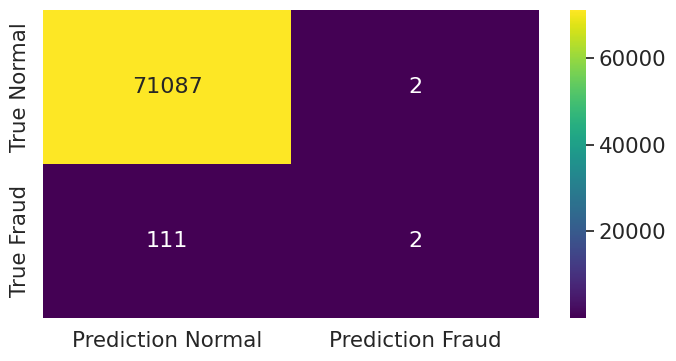

In [ ]:
ANN_conf_matrix = pd.DataFrame(ANN_conf_matrix, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(ANN_conf_matrix, annot=True,annot_kws={"size": 16},fmt='g', cmap='viridis')

# **Deal with Imbalance data**

**ROS (Random Over-Sampling)**

เพิ่มจำนวนตัวอย่างในคลาสที่น้อยกว่าโดยการสุ่มสำเนาตัวอย่างที่มีอยู่แล้ว

ข้อดี: ช่วยแก้ปัญหาคลาสไม่สมดุลได้ง่ายและรวดเร็ว

ข้อเสีย: อาจเกิดปัญหา overfitting เพราะเพิ่มข้อมูลเดิมซ้ำๆ

**RUS (Random Under-Sampling)**

ลดจำนวนตัวอย่างในคลาสที่มากกว่าโดยการสุ่มลบตัวอย่างออก

ข้อดี: ลดเวลาและทรัพยากรในการประมวลผล

ข้อเสีย: อาจสูญเสียข้อมูลสำคัญในคลาสที่มีตัวอย่างมากกว่า

**CC (Cluster Centroids)**

ใช้ k-means clustering ลดขนาดข้อมูลในคลาสที่มากกว่า โดยแทนด้วย centroid ของกลุ่ม

ข้อดี: ช่วยลดปัญหาการสูญเสียข้อมูลสำคัญเมื่อเทียบกับ RUS

ข้อเสีย: ขึ้นอยู่กับวิธี clustering และอาจไม่สะท้อนข้อมูลต้นฉบับครบถ้วน

**SMOTE (Synthetic Minority Oversampling Technique)**

สร้างตัวอย่างใหม่ในคลาสที่น้อยกว่าด้วยการใช้ข้อมูลจริงและสร้างจุดใหม่ในระหว่างข้อมูล

ข้อดี: ช่วยเพิ่มความหลากหลายของข้อมูลในคลาสที่น้อยกว่า

ข้อเสีย: อาจสร้างตัวอย่างที่ไม่สมจริงในบางกรณี

# Random Over-sampling (ROS)

Oversampling results:
0    284315
1    284315
Name: count, dtype: int64


<ipython-input-42-d66ba6ca010a>:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


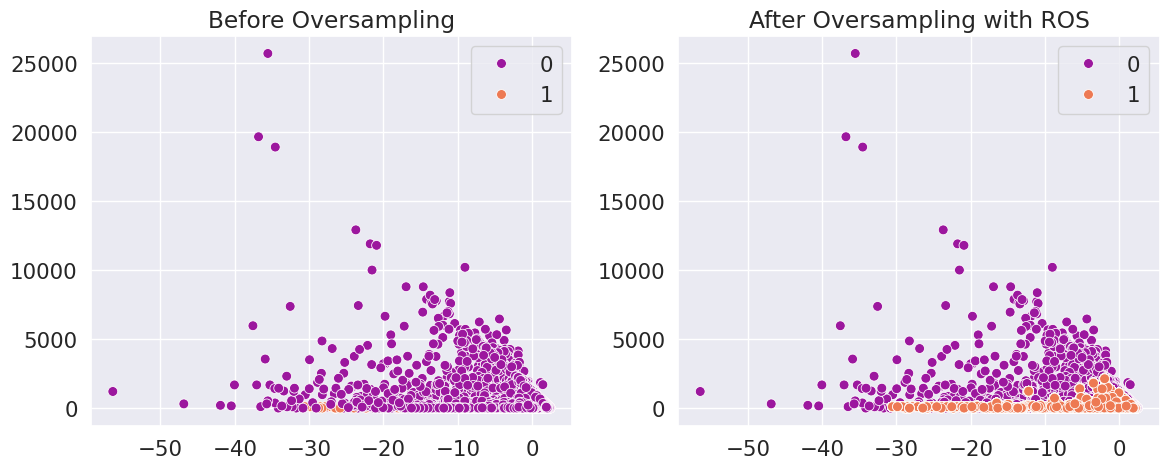

In [ ]:
oversampler = RandomOverSampler()
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

ROS_data = pd.Series(y_oversampled)

print("Oversampling results:")
print(ROS_data.value_counts())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="plasma", s=50)
plt.title("Before Oversampling")

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_oversampled[:, 0], y=X_oversampled[:, 1], hue=y_oversampled, palette="plasma", s=50)
plt.title("After Oversampling with ROS")

plt.tight_layout()
plt.show()

# Random Under-sampling (RUS)


Undersampling results:
0    492
1    492
Name: count, dtype: int64


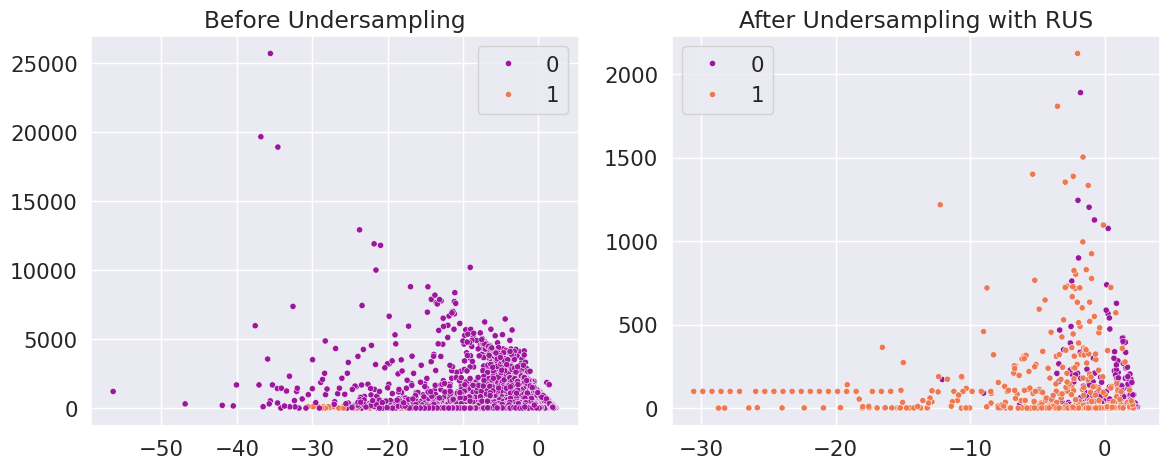

In [ ]:
undersampler = RandomUnderSampler()
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

RUS_data = pd.Series(y_undersampled)

print("\nUndersampling results:")
print(RUS_data.value_counts())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="plasma", s=20)
plt.title("Before Undersampling")

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_undersampled[:, 0], y=X_undersampled[:, 1], hue=y_undersampled, palette="plasma", s=20)
plt.title("After Undersampling with RUS")

plt.tight_layout()
plt.show()

# Cluster Centroid to dectect anomoly (Undersampling)


Undersampling results:
0    492
1    492
Name: count, dtype: int64


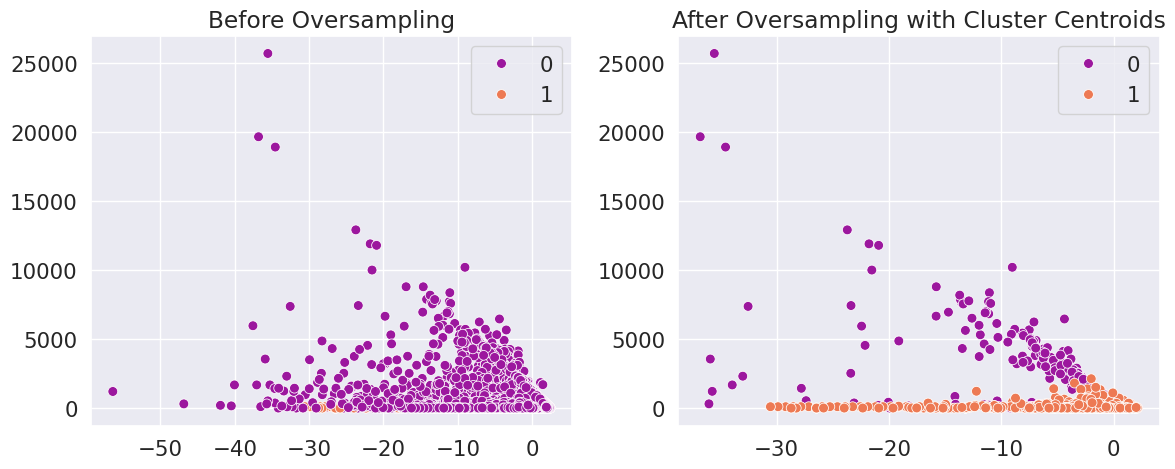

In [ ]:
CC_sampler = ClusterCentroids()
XC_undersampled, yC_undersampled = CC_sampler.fit_resample(X, y)

CC_data = pd.Series(yC_undersampled)

print("\nUndersampling results:")
print(CC_data.value_counts())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="plasma", s=50)
plt.title("Before Oversampling")

plt.subplot(1, 2, 2)
sns.scatterplot(x=XC_undersampled[:, 0], y=XC_undersampled[:, 1], hue=yC_undersampled, palette="plasma", s=50)
plt.title("After Oversampling with Cluster Centroids")

plt.tight_layout()
plt.show()

# SMOTE


Oversampling results:
0    213226
1    213226
Name: count, dtype: int64


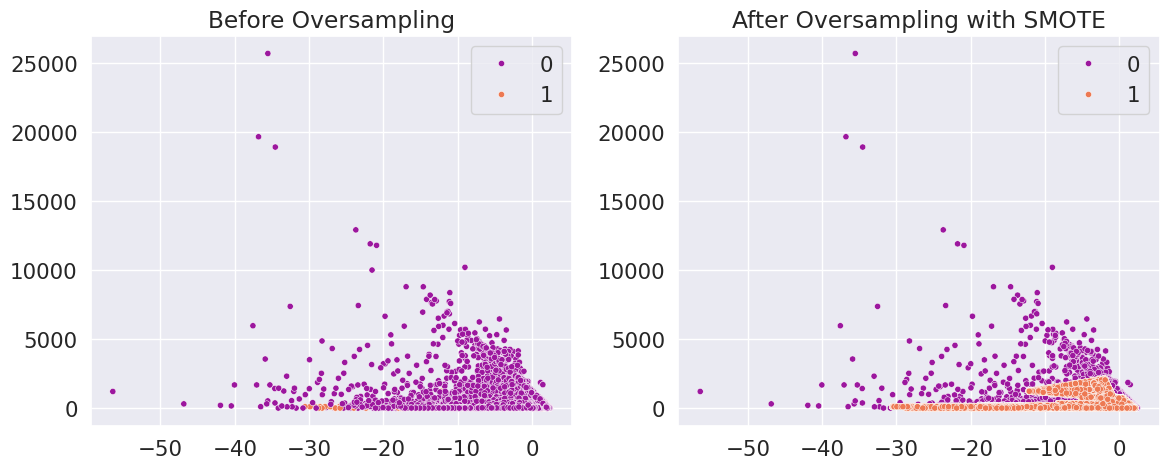

In [ ]:
SMOTE_sampler = SMOTE()

SX_oversampled, Sy_oversampled = SMOTE_sampler.fit_resample(X_train, y_train)

SMOTE_data = pd.Series(Sy_oversampled)

print("\nOversampling results:")
print(SMOTE_data.value_counts())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="plasma", s=20)
plt.title("Before Oversampling")

plt.subplot(1, 2, 2)
sns.scatterplot(x=SX_oversampled[:, 0], y=SX_oversampled[:, 1], hue=Sy_oversampled, palette="plasma", s=20)
plt.title("After Oversampling with SMOTE")

plt.tight_layout()
plt.show()

# **Sampling Method + ANN**

#Artificial Neural Networks - ANN + ROS

In [ ]:
# Train the model
model.fit(X_oversampled, y_oversampled, epochs=10, batch_size=32)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

Epoch 1/10
17770/17770 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - accuracy: 0.8713 - loss: 0.3027
Epoch 2/10
17770/17770 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - accuracy: 0.8722 - loss: 0.3004
Epoch 3/10
17770/17770 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - accuracy: 0.8721 - loss: 0.2990
Epoch 4/10
17770/17770 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.8729 - loss: 0.2988
Epoch 5/10
17770/17770 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.8744 - loss: 0.2957
Epoch 6/10
17770/17770 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.8738 - loss: 0.2960
Epoch 7/10
17770/17770 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.8744 - loss: 0.2961
Epoch 8/10
17770/17770 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.8763 - loss: 0.2919
Epoch 9/10
17770/17770 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.8768 - loss: 0.2915
Epoch 10/10
17770/17770 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8769 - loss: 0.2905
2226/2226 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8605 - loss: 0.3140
Test accurac

In [ ]:
# Predict probabilities and classes
y_pred_proba = model.predict(X_test)
y_pred_classes = (y_pred_proba > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)
print("Confusion Matrix:\n", conf_matrix)


2226/2226 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Accuracy: 0.862321283110025
Precision: 0.010309278350515464
Recall: 0.9026548672566371
F1 Score: 0.020385729989007693
AUC: 0.9502361305291372
Confusion Matrix:
 [[61297  9792]
 [   11   102]]


#Artificial Neural Networks - ANN + RUS

In [ ]:
model.fit(X_undersampled, y_undersampled, epochs=10, batch_size=32)
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8877 - loss: 0.2694
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8935 - loss: 0.2585
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9023 - loss: 0.2394
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8977 - loss: 0.2472
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8839 - loss: 0.2535
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9167 - loss: 0.2179
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8913 - loss: 0.2684
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8838 - loss: 0.2631
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9038 - loss: 0.2449
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9006 - loss: 0.2388
2226/2226 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8271 - loss: 0.3955
Test accuracy: 0.8288531303405762


In [ ]:
RUS_y_pred_proba = model.predict(X_test)
RUS_y_pred_classes = np.where(RUS_y_pred_proba > 0.5, 1, 0)

RUS_ANN_accuracy = accuracy_score(y_test, RUS_y_pred_classes)
RUS_ANN_precision = precision_score(y_test, RUS_y_pred_classes)
RUS_ANN_recall = recall_score(y_test, RUS_y_pred_classes)
RUS_ANN_f1 = f1_score(y_test, RUS_y_pred_classes)

RUS_ANN_auc = roc_auc_score (y_test, RUS_y_pred_proba)
RUS_ANN_conf_matrix = confusion_matrix(y_test, RUS_y_pred_classes)

print("Accuracy:", RUS_ANN_accuracy)
print("Precision:", RUS_ANN_precision)
print("Recall:", RUS_ANN_recall)
print("F1 Score:", RUS_ANN_f1)
print("AUC:", RUS_ANN_auc)
print("Confusion Matrix:\n", RUS_ANN_conf_matrix)

2226/2226 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Accuracy: 0.8288531221033117
Precision: 0.008388305236582783
Recall: 0.911504424778761
F1 Score: 0.016623628147191736
AUC: 0.9454752406213476
Confusion Matrix:
 [[58913 12176]
 [   10   103]]


#Artificial Neural Networks - ANN + CC

In [ ]:
model.fit(XC_undersampled, yC_undersampled, epochs=10, batch_size=32)
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7964 - loss: 0.4419 
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8641 - loss: 0.3508 
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8766 - loss: 0.2942 
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8696 - loss: 0.3112 
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8729 - loss: 0.3162 
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8838 - loss: 0.2842
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8800 - loss: 0.2932 
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8922 - loss: 0.2743 
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8908 - loss: 0.2824 
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8795 - loss: 0.2970 
2226/2226 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7678 - loss: 0.6503
Test accuracy: 0.7693182826042175


In [ ]:
CC_y_pred_proba = model.predict(X_test)
CC_y_pred_classes = np.where(CC_y_pred_proba > 0.5, 1, 0)

CC_ANN_accuracy = accuracy_score(y_test, CC_y_pred_classes)
CC_ANN_precision = precision_score(y_test, CC_y_pred_classes)
CC_ANN_recall = recall_score(y_test, CC_y_pred_classes)
CC_ANN_f1 = f1_score(y_test, CC_y_pred_classes)


CC_ANN_auc = roc_auc_score (y_test, CC_y_pred_proba)
CC_ANN_conf_matrix = confusion_matrix(y_test, CC_y_pred_classes)

print("Accuracy:", CC_ANN_accuracy)
print("Precision:", CC_ANN_precision)
print("Recall:", CC_ANN_recall)
print("F1 Score:", CC_ANN_f1)
print("AUC:", CC_ANN_f1)
print("Confusion Matrix:\n", CC_ANN_conf_matrix)

2226/2226 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Accuracy: 0.7693182775764725
Precision: 0.005876650914818854
Recall: 0.8584070796460177
F1 Score: 0.011673385883627175
AUC: 0.011673385883627175
Confusion Matrix:
 [[54680 16409]
 [   16    97]]


#Artificial Neural Networks - ANN + SMOTE

In [ ]:
model.fit(SX_oversampled, Sy_oversampled, epochs=10, batch_size=32)
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

Epoch 1/10
13327/13327 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8437 - loss: 0.3894
Epoch 2/10
13327/13327 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.8558 - loss: 0.3428
Epoch 3/10
13327/13327 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - accuracy: 0.8569 - loss: 0.3381
Epoch 4/10
13327/13327 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.8607 - loss: 0.3307
Epoch 5/10
13327/13327 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8611 - loss: 0.3291
Epoch 6/10
13327/13327 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.8623 - loss: 0.3265
Epoch 7/10
13327/13327 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8619 - loss: 0.3259
Epoch 8/10
13327/13327 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8632 - loss: 0.3246
Epoch 9/10
13327/13327 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8625 - loss: 0.3246
Epoch 10/10
13327/13327 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.8645 - loss: 0.3209
2226/2226 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8676 - loss: 0.3213
Test accurac

In [ ]:
SMOTE_y_pred_proba = model.predict(X_test)
SMOTE_y_pred_classes = np.where(SMOTE_y_pred_proba > 0.5, 1, 0)

SMOTE_ANN_accuracy = accuracy_score(y_test, SMOTE_y_pred_classes)
SMOTE_ANN_precision = precision_score(y_test, SMOTE_y_pred_classes)
SMOTE_ANN_recall = recall_score(y_test, SMOTE_y_pred_classes)
SMOTE_ANN_f1 = f1_score(y_test, SMOTE_y_pred_classes)

SMOTE_ANN_auc = roc_auc_score (y_test, SMOTE_y_pred_proba)
SMOTE_ANN_conf_matrix = confusion_matrix(y_test, SMOTE_y_pred_classes)

print("Accuracy:", SMOTE_ANN_accuracy)
print("Precision:", SMOTE_ANN_precision)
print("Recall:", SMOTE_ANN_recall)
print("F1 Score:", SMOTE_ANN_f1)
print("AUC:", SMOTE_ANN_auc)
print("Confusion Matrix:\n", SMOTE_ANN_conf_matrix)

2226/2226 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Accuracy: 0.8696946714979916
Precision: 0.008684464458025088
Recall: 0.7168141592920354
F1 Score: 0.017161016949152542
AUC: 0.8268609322702428
Confusion Matrix:
 [[61843  9246]
 [   32    81]]
